<a href="https://colab.research.google.com/github/Anikcse19/Books-site-with-responsive/blob/main/Thesis_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

imported batting data

In [ ]:
batting_data=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Batting list/Batting dataset (1).xlsx - Sheet1.csv',encoding= 'unicode_escape')
batting_data

In [ ]:
batting_data.info()

In [ ]:
batting_data.describe()

Find coorelation of batting dataset

In [ ]:
batting_data.corr()

In [ ]:
plt.figure(figsize=(12,10))
corr=batting_data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
batting_data_updated=batting_data.drop('Minutes', axis=1)

In [ ]:
batting_data_updated

Imported Batting weather dataset


In [ ]:
batting_weather_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Weather Dataset/Weather Dataset - Sheet1.csv')
batting_weather_dataset

In [ ]:
batting_weather_dataset.info()

Find coorelation of weather dataset

In [ ]:
batting_weather_dataset.corr()

In [ ]:
plt.figure(figsize=(12,10))
corr=batting_weather_dataset.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
batting_weather_dataset_updated=batting_weather_dataset.drop('Feels',axis=1)
batting_weather_dataset_updated=batting_weather_dataset_updated.drop('Gust',axis=1)
batting_weather_dataset_updated

Bowling weather dataset

In [ ]:
bowling_weather_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Bowling Weather Dataset/Bowling weather dataset - Sheet1.csv')
bowling_weather_dataset

In [ ]:
bowling_weather_dataset.corr()

In [ ]:
plt.figure(figsize=(12,10))
corr=batting_weather_dataset.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
bowling_weather_dataset_updated=bowling_weather_dataset.drop('Feels',axis=1)
bowling_weather_dataset_updated=bowling_weather_dataset_updated.drop('Gust',axis=1)
bowling_weather_dataset_updated

Imported Fielding Weather Dataset

In [ ]:
fielding_weather_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Bowling Weather Dataset/Bowling weather dataset - Sheet1.csv')
fielding_weather_dataset

In [ ]:
fielding_weather_dataset_updated=fielding_weather_dataset.drop('Feels',axis=1)
fielding_weather_dataset_updated=fielding_weather_dataset_updated.drop('Gust',axis=1)
fielding_weather_dataset_updated

Imported Bowling Dataset

In [ ]:
bowling_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Bowling List/Bowling_data - Bowling_data (1).csv')
bowling_dataset

In [ ]:
bowling_dataset.info()

In [ ]:
bowling_dataset.describe()

In [ ]:
bowling_dataset.corr()

In [ ]:
plt.figure(figsize=(12,10))
corr=bowling_dataset.corr()
sns.heatmap(corr,annot=True)
plt.show()

Individual Player performance

In [ ]:
def get_batting_consistency(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_runs = 0
    total_balls=0
    innings=0
    not_out=0
    average=0
    centuries=0
    fiftees=0
    zeros=0
    for i in range(len(player_df)):


        innings=innings+1
        desc= player_df.iloc[i]['Description']
        if (desc=='not out'):
          not_out=not_out+1
        balls= player_df.iloc[i]['Balls']
        runs= player_df.iloc[i]['Runs']
        if (runs>=100):
          centuries=centuries+1
        if (runs>=50 and runs<100):
          fiftees=fiftees+1
        if (runs==0):
          zeros=zeros+1
        
        stats = {
            'description': player_df.iloc[i]['Description'],
            'runs': player_df.iloc[i]['Runs'],
            'balls': player_df.iloc[i]['Balls'],
            'fours': player_df.iloc[i]['Fours'],
            'sixes': player_df.iloc[i]['Sixes']
        }
        total_runs += player_df.iloc[i]['Runs']
        total_balls+= player_df.iloc[i]['Balls']
        
        stats_list.append(stats)
    try:
      average=total_runs/(innings-not_out)
    except:
      average=0

    strike_rate=(total_runs/total_balls)*100

    Consistency = round(0.4262*average + 0.2566*innings + 0.1510*strike_rate + 0.0787*centuries + 0.0556*fiftees - 0.0328*zeros,2)
    
    return Consistency


In [ ]:
batting_consistency = get_batting_consistency(batting_data_updated, 'Afif Hossain')
batting_form=batting_consistency
batting_opposition=batting_consistency

print(batting_consistency)
print(batting_form)


In [ ]:
def get_batting_venue(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_runs = 0
    total_balls=0
    innings=0
    not_out=0
    average=0
    centuries=0
    fiftees=0
    zeros=0
    hs=0
    for i in range(len(player_df)):


        innings=innings+1
        desc= player_df.iloc[i]['Description']
        if (desc=='not out'):
          not_out=not_out+1
        balls= player_df.iloc[i]['Balls']
        runs= player_df.iloc[i]['Runs']
        if (runs>hs):
          hs=runs
        if (runs>=100):
          centuries=centuries+1
        if (runs>=50 and runs<100):
          fiftees=fiftees+1
        if (runs==0):
          zeros=zeros+1
        
        stats = {
            'description': player_df.iloc[i]['Description'],
            'runs': player_df.iloc[i]['Runs'],
            'balls': player_df.iloc[i]['Balls'],
            'fours': player_df.iloc[i]['Fours'],
            'sixes': player_df.iloc[i]['Sixes']
        }
        total_runs += player_df.iloc[i]['Runs']
        total_balls+= player_df.iloc[i]['Balls']

        
        stats_list.append(stats)
    average=total_runs/(innings-not_out)
    strike_rate=(total_runs/total_balls)*100
  

    Consistency = round(0.4262*average + 0.2566*innings + 0.1510*strike_rate + 0.0787*centuries + 0.0556*fiftees -0.0328*hs ,2)
    
    return Consistency


In [ ]:
batting_venue=get_batting_venue(batting_data_updated,'Tamim Iqbal')
print(batting_venue)

In [ ]:
def get_bolwer_consistency(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_overs = 0
    total_runs=0
    total_wickets=0
    innings=0
    fifer=0
    for i in range(len(player_df)):


        wickets=player_df.iloc[i]['Bowler_Wickets']
        if(wickets==5):
          fifer=fifer+1

        innings=innings+1
        total_overs += player_df.iloc[i]['Overs']
        total_wickets += player_df.iloc[i]['Bowler_Wickets']
        total_runs += player_df.iloc[i]['Runs']

        
        stats_list.append(stats)
    strike_rate=round((total_overs*6/total_wickets),2)
    average= round(total_runs/total_wickets,2)

    Consistency = round(0.4174*total_overs + 0.2634*innings + 0.1602*strike_rate + 0.0975*average + 0.0615*fifer,2)
    
    return Consistency


In [ ]:


bowling_consistency= get_bolwer_consistency(bowling_dataset, 'Mehidy Hasan Miraz')

print(bowling_consistency)


In [ ]:
def get_bowler_form(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_overs = 0
    total_runs=0
    total_wickets=0
    innings=0
    fifer=0
    for i in range(len(player_df)):


        wickets=player_df.iloc[i]['Bowler_Wickets']
        if(wickets==5):
          fifer=fifer+1

        innings=innings+1
        total_overs += player_df.iloc[i]['Overs']
        total_wickets += player_df.iloc[i]['Bowler_Wickets']
        total_runs += player_df.iloc[i]['Runs']

        
        stats_list.append(stats)
    strike_rate=round((total_overs*6/total_wickets),2)
    average= round(total_runs/total_wickets,2)

    form = round(0.3269*total_overs + 0.2846*innings + 0.1877*strike_rate + 0.1210*average + 0.0798*fifer,2)
    
    return form 


In [ ]:
bowling_form=get_bowler_form(bowling_dataset, 'Mehidy Hasan Miraz')
print(bowling_form)

In [ ]:
def get_bowling_opposition(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_overs = 0
    total_runs=0
    total_wickets=0
    innings=0
    fifer=0
    for i in range(len(player_df)):


        wickets=player_df.iloc[i]['Bowler_Wickets']
        if(wickets==5):
          fifer=fifer+1

        innings=innings+1
        total_overs += player_df.iloc[i]['Overs']
        total_wickets += player_df.iloc[i]['Bowler_Wickets']
        total_runs += player_df.iloc[i]['Runs']

        
        stats_list.append(stats)
    strike_rate=round((total_overs*6/total_wickets),2)
    average= round(total_runs/total_wickets,2)

    opposition= round(0.3177*total_overs + 0.3177*innings + 0.1933*strike_rate + 0.1465*average + 0.0943*fifer,2)
    
    return opposition 


In [ ]:
bowling_opposition=get_bowling_opposition(bowling_dataset, 'Mehidy Hasan Miraz')
print(bowling_opposition)

In [ ]:
def get_bowling_venue(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_overs = 0
    total_runs=0
    total_wickets=0
    innings=0
    fifer=0
    for i in range(len(player_df)):


        wickets=player_df.iloc[i]['Bowler_Wickets']
        if(wickets==5):
          fifer=fifer+1

        innings=innings+1
        total_overs += player_df.iloc[i]['Overs']
        total_wickets += player_df.iloc[i]['Bowler_Wickets']
        total_runs += player_df.iloc[i]['Runs']

        
        stats_list.append(stats)
    strike_rate=round((total_overs*6/total_wickets),2)
    average= round(total_runs/total_wickets,2)

    venue= round(0.3018*total_overs + 0.2783*innings + 0.1836*strike_rate + 0.1391*average + 0.0972*fifer,2)
    
    return venue


In [ ]:
bowling_venue=get_bowling_venue(bowling_dataset, 'Mehidy Hasan Miraz')
print(bowling_venue)

In [ ]:
#import fielding dataset
fielding_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Fielding Dataset/Fielding Dataset - Sheet1.csv')
fielding_dataset

In [ ]:
def get_fielding_success_rate(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]

    total_catches_taken = 0
    total_run_out_taken = 0
    total_catches_dropped = 0
    total_runout_dropped = 0

    for i in range(len(player_df)):
        total_catches_taken += player_df.iloc[i]['Catches']
        total_run_out_taken += player_df.iloc[i]['Run Outs']
        total_catches_dropped += player_df.iloc[i]['Dropped catches']
        total_runout_dropped += player_df.iloc[i]['Missed Runouts']

    success_rate = (total_catches_taken + total_run_out_taken) / (total_catches_taken + total_run_out_taken + total_catches_dropped + total_runout_dropped)
    success_rate=round(success_rate,2)
    return success_rate


In [ ]:
x=get_fielding_success_rate(fielding_dataset,'Shakib Al Hasan')
print(x)

***BattiNg PerformaNce PredictioN Module***

In [ ]:
batting_df=batting_data_updated
batting_df

In [ ]:
batting_weather_df=batting_weather_dataset_updated
batting_weather_df

In [ ]:
batting_merged_df = pd.merge(batting_df, batting_weather_df, on=['Match_id'])
batting_merged_df.shape
# columns_1= batting_merged_df.columns.tolist()
# print(columns_1)


**Add Batting consistency and batting form into the dataset**



In [ ]:
# Iterate over rows of batting_merged_df
for index, row in batting_merged_df.iterrows():
    # Get the player name from the row
    player_name = row['Name']
    
    # Calculate the batting consistency and form for the player
    batting_consistency = get_batting_consistency(batting_merged_df, player_name)
    batting_form = get_batting_consistency(batting_merged_df, player_name)
    
    # Set the values for the new columns in the row
    batting_merged_df.at[index, 'batting_consistency'] = batting_consistency
    batting_merged_df.at[index, 'batting_form'] = batting_form


batting_merged_df
# columns_1= batting_merged_df.columns.tolist()
# print(columns_1)

,Name,Description,Runs,Balls,Fours,Sixes,Strike_Rate,Batting_position,Match_id,Date,URL_Text,Batting_Session,Venue,Temp,Wind,Rain,Cloud,Pressure,batting_consistency,batting_form
0,Tamim Iqbal,c â Dhoni b Yadav,25,25,4,0,100,1,656485,19-Mar-15,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,14,0.2,73,1017,52.49,52.49
1,Imrul Kayes,run out (Jadeja/Yadav),5,14,0,0,35.71,2,656485,19-Mar-15,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,14,0.2,73,1017,39.70,39.70
2,Soumya Sarkar,c Dhoni b Mohammed Shami,29,43,3,1,67.44,3,656485,19-Mar-15,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,14,0.2,73,1017,42.61,42.61
3,Mahmudullah,c Dhawan b Mohammed Shami,21,31,2,0,67.74,4,656485,19-Mar-15,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,14,0.2,73,1017,50.47,50.47
4,Shakib Al Hasan,c Mohammed Shami b Jadeja,10,34,0,0,29.41,5,656485,19-Mar-15,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,14,0.2,73,1017,51.72,51.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,Taskin Ahmed,c Adair b Hume,11,7,0,1,157.14,8,1355717,18-Mar-23,ODI # 4539,10.45-14.15,Sylhet International Cricket Stadium,26,15,0.0,27,1013,18.35,18.35
921,Nasum Ahmed,not out,11,7,2,0,157.14,9,1355717,18-Mar-23,ODI # 4539,10.45-14.15,Sylhet International Cricket Stadium,26,15,0.0,27,1013,inf,inf
922,Mustafizur Rahman,not out,1,2,0,0,50,10,1355717,18-Mar-23,ODI # 4539,10.45-14.15,Sylhet International Cricket Stadium,26,15,0.0,27,1013,20.94,20.94
923,Tamim Iqbal (c),not out,41,41,5,2,100,1,1355719,23-Mar-23,ODI # 4547,15.00-18.30,Sylhet International Cricket Stadium,26,10,0.0,8,1006,35.08,35.08


Match List imported

In [ ]:
match_list_df=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Match list data/match_lists_data - match_lists_data (1).csv')
match_list_df

,Score,Wickets,Overs,RPO,Target,Innings,Result,Opposition,Ground,Date,Match_id,Url text,Batting_Session,Bowling_Session,Venue,Toss_Win
0,193,10,45.0,4.28,303.0,2,lost,India,Melbourne,19-Mar-2015,656485,ODI # 3641,18.45-22.15,14.30-18.00,MelbourneCricketGround,False
1,329,6,50.0,6.58,NaN,1,won,Pakistan,Mirpur,17-Apr-2015,858485,ODI # 3647,14.30-18.00,18.45-22.15,ShereBanglaNationalStadium,True
2,240,3,38.1,6.28,240.0,2,won,Pakistan,Mirpur,19-Apr-2015,858487,ODI # 3648,18.45-22.15,14.30-18.00,ShereBanglaNationalStadium,False
3,251,2,39.3,6.35,251.0,2,won,Pakistan,Mirpur,22-Apr-2015,858489,ODI # 3649,18.45-22.15,14.30-18.00,ShereBanglaNationalStadium,False
4,307,10,49.4,6.18,NaN,1,won,India,Mirpur,18-Jun-2015,870731,ODI # 3658,15.00-18.30,19.15-22.45,ShereBanglaNationalStadium,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,209,10,47.2,4.41,NaN,1,lost,England,Mirpur,1-Mar-2023,1351397,ODI # 4525,12.00-15.30,16.15-19.45,ShereBanglaNationalStadium,True
102,194,10,44.4,4.34,327.0,2,lost,England,Mirpur,3-Mar-2023,1351398,ODI # 4528,16.15-19.45,12.00-15.30,ShereBanglaNationalStadium,True
103,246,10,48.5,5.03,NaN,1,won,England,Chattogram,6-Mar-2023,1351399,ODI # 4531,12.00-15.30,16.15-19.45,ZahurAhmedChowdhuryStadium,True
104,338,8,50.0,6.76,NaN,1,won,Ireland,Sylhet,18-Mar-2023,1355717,ODI # 4539,10.45-14.15,15.00-18.30,SylhetInternationalCricketStadium,False


In [ ]:
# columns_1= batting_merged_df.columns.tolist()
# columns_2= match_list_df.columns.tolist()
# # Print the column names
# print(columns_1)
# print(columns_2)

# Get the column names as sets
columns1 = set(batting_merged_df.columns)
columns2 = set(match_list_df.columns)

# Find the common columns
common_cols = columns1.intersection(columns2)

# Print the number of common columns and their names
print("Number of common columns:", len(common_cols))
print("Common column names:", list(common_cols))

Number of common columns: 4
Common column names: ['Date', 'Batting_Session', 'Match_id', 'Venue']


Merged Batting_merged_df and Match list after droping the duplicate columns

In [ ]:
match_list_df= match_list_df.drop(['Date', 'Venue', 'Batting_Session',], axis=1)
match_list_df

,Score,Wickets,Overs,RPO,Target,Innings,Result,Opposition,Ground,Match_id,Url text,Bowling_Session,Toss_Win
0,193,10,45.0,4.28,303.0,2,lost,India,Melbourne,656485,ODI # 3641,14.30-18.00,False
1,329,6,50.0,6.58,NaN,1,won,Pakistan,Mirpur,858485,ODI # 3647,18.45-22.15,True
2,240,3,38.1,6.28,240.0,2,won,Pakistan,Mirpur,858487,ODI # 3648,14.30-18.00,False
3,251,2,39.3,6.35,251.0,2,won,Pakistan,Mirpur,858489,ODI # 3649,14.30-18.00,False
4,307,10,49.4,6.18,NaN,1,won,India,Mirpur,870731,ODI # 3658,19.15-22.45,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,209,10,47.2,4.41,NaN,1,lost,England,Mirpur,1351397,ODI # 4525,16.15-19.45,True
102,194,10,44.4,4.34,327.0,2,lost,England,Mirpur,1351398,ODI # 4528,12.00-15.30,True
103,246,10,48.5,5.03,NaN,1,won,England,Chattogram,1351399,ODI # 4531,16.15-19.45,True
104,338,8,50.0,6.76,NaN,1,won,Ireland,Sylhet,1355717,ODI # 4539,15.00-18.30,False


**Check commoN columNs betwee two dataset**

In [ ]:
# Get the column names as sets
columns1 = set(batting_merged_df.columns)
columns2 = set(match_list_df.columns)

# Find the common columns
common_cols = columns1.intersection(columns2)

# Print the number of common columns and their names
print("Number of common columns:", len(common_cols))
print("Common column names:", list(common_cols))

Number of common columns: 1
Common column names: ['Match_id']


Merged Previous two dataset with match list dataset

In [ ]:
batting_match_df = pd.merge(batting_merged_df, match_list_df, on='Match_id')
print(batting_match_df)
batting_match_df.shape
columns_1= batting_match_df.columns.tolist()
print(columns_1)



                  Name                Description  Runs  Balls  Fours  Sixes  \
0          Tamim Iqbal         c â Dhoni b Yadav    25     25      4      0   
1          Imrul Kayes     run out (Jadeja/Yadav)     5     14      0      0   
2        Soumya Sarkar   c Dhoni b Mohammed Shami    29     43      3      1   
3          Mahmudullah  c Dhawan b Mohammed Shami    21     31      2      0   
4      Shakib Al Hasan  c Mohammed Shami b Jadeja    10     34      0      0   
..                 ...                        ...   ...    ...    ...    ...   
920       Taskin Ahmed             c Adair b Hume    11      7      0      1   
921        Nasum Ahmed                    not out    11      7      2      0   
922  Mustafizur Rahman                    not out     1      2      0      0   
923    Tamim Iqbal (c)                    not out    41     41      5      2   
924         Litton Das                    not out    50     38     10      0   

    Strike_Rate  Batting_position  Matc

Feature **Importance**

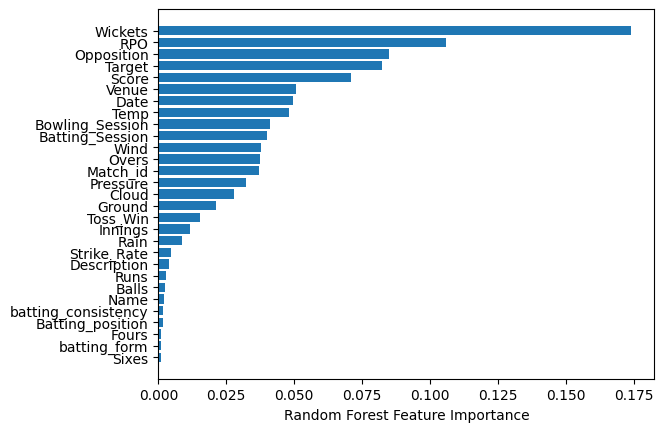

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# replace '-' with NaN
batting_match_df = batting_match_df.replace('-', np.nan)

# fill NaN values with a numeric value
batting_match_df = batting_match_df.fillna(0)

# separate the target variable
y = batting_match_df['Result']
# print(X)
X = batting_match_df.drop(columns=['Result','URL_Text','Url text'])
# print(X)


# encode categorical variables
cat_cols = ['Name', 'Description', 'Batting_Session', 'Date', 'Venue', 'Opposition', 'Ground', 'Bowling_Session', 'Toss_Win']
encoder = LabelEncoder()
X_encoded = X[cat_cols].apply(encoder.fit_transform)
X_encoded = X_encoded.join(X.drop(cat_cols, axis=1))

# print(X_encoded)
# print(X_encoded.max())
# print(X_encoded.min())

# replace infinity with NaN and drop rows containing NaN values
X_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
X_encoded.dropna(inplace=True)
y = y[X_encoded.index]



# scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# print(X_scaled)
# feature selection using Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


# fit the model on the selected features
rfc.fit(X_scaled, y)

# get the important feature names
feature_names = X_encoded.columns.tolist()


# plot feature importance
importance = rfc.feature_importances_
sorted_idx = np.argsort(importance)

plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_encoded.columns[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()



Run Random forest model to predict batting performance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# print(X_scaled.columns)

batting_match_df.replace([np.inf, -np.inf],np.nan,inplace=True)
batting_match_df.dropna(inplace=True)

# separate the target variables
y = batting_match_df[['Runs', 'Balls', 'Fours', 'Sixes', 'Batting_position']]
# y_runs = y['Runs']
# y_balls = y['Balls']
# y_fours = y['Fours']
# y_sixes = y['Sixes']
# y_position = y['Batting_position']

X = batting_match_df[['Opposition','Target','Score','Strike_Rate','Toss_Win','Temp','Venue','Overs','Batting_Session','Wind','Pressure','Innings','batting_consistency']]

# encode categorical variables
cat_cols = ['Venue', 'Opposition', 'Batting_Session','Toss_Win']
encoder = LabelEncoder()
X_encoded = X[cat_cols].apply(encoder.fit_transform)
X_encoded = X_encoded.join(X.drop(cat_cols, axis=1))


# scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# print(y_train)

# train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lr.predict(X_test)

# calculate RMSE and R-squared values of lR model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)
print('\n\n')
print("*********************Overall Result of Linear Regression Model*********************************")
print('RMSE:', rmse)
print('R-squared:', r_squared)
print('\n\n')

#train the random forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rfc.predict(X_test)

# calculate RMSE and R-squared values of random forest model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)
print("***********Overall Result of Random forest Model******************")
print('RMSE:', rmse)
print('R-squared:', r_squared)
print('\n\n')


# train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
multi_gbr = MultiOutputRegressor(gbr)
multi_gbr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = multi_gbr.predict(X_test)

# calculate RMSE and R-squared values of gradiant boosting model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("***********Overall Result of Gradiant Boosting Model******************")
print('RMSE:', rmse)
print('R-squared:', r_squared)

print("******************Individual result********************")
for i, col in enumerate(y.columns):
    rmse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i], squared=False)
    r_squared = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(col)
    print('RMSE:', rmse)
    print('R-squared:', r_squared)





*********************Overall Result of Linear Regression Model*********************************
RMSE: 11.457810999683446
R-squared: 0.23592912914970202



***********Overall Result of Random forest Model******************
RMSE: 14.550766383493544
R-squared: -0.1846260797254519



***********Overall Result of Gradiant Boosting Model******************
RMSE: 9.87055240449822
R-squared: 0.43529324529704694
******************Individual result********************
Runs
RMSE: 21.686925977441316
R-squared: 0.424241604519241
Balls
RMSE: 23.336606199354428
R-squared: 0.3751945141360761
Fours
RMSE: 2.4444939862818122
R-squared: 0.40194323705300194
Sixes
RMSE: 0.7862231939662365
R-squared: 0.10784359925010689
Batting_position
RMSE: 1.0985126654473072
R-squared: 0.8672432715268087


**Performance between training data and testing data**

In [ ]:

# make predictions on the training set
y_train_pred = rfc.predict(X_train)

# calculate RMSE and R-squared values for training set
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r_squared_train = r2_score(y_train, y_train_pred)

print('Training set RMSE:', rmse_train)
print('Training set R-squared:', r_squared_train)

# make predictions on the testing set
y_test_pred = rfc.predict(X_test)

# calculate RMSE and R-squared values for testing set
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r_squared_test = r2_score(y_test, y_test_pred)

print('Testing set RMSE:', rmse_test)
print('Testing set R-squared:', r_squared_test)

Training set RMSE: 0.0
Training set R-squared: 1.0
Testing set RMSE: 14.550766383493544
Testing set R-squared: -0.1846260797254519


['Runs', 'Balls', 'Fours', 'Sixes', 'Batting_position']


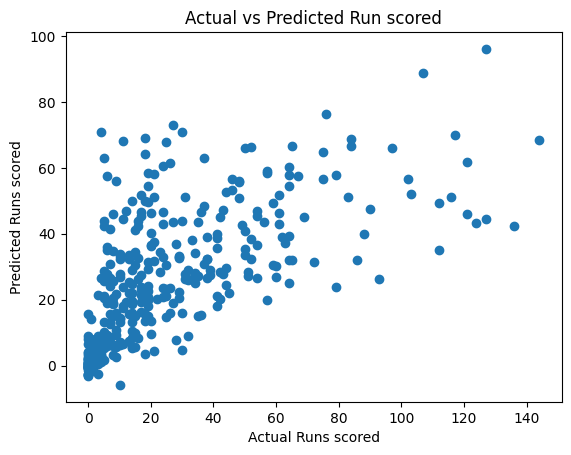

In [ ]:
# plot actual vs predicted runs
c=y_test.columns.tolist()
print(c)

plt.scatter(y_test['Runs'], y_pred[:,0])
plt.xlabel('Actual Runs scored')
plt.ylabel('Predicted Runs scored')
plt.title('Actual vs Predicted Run scored')
plt.show()


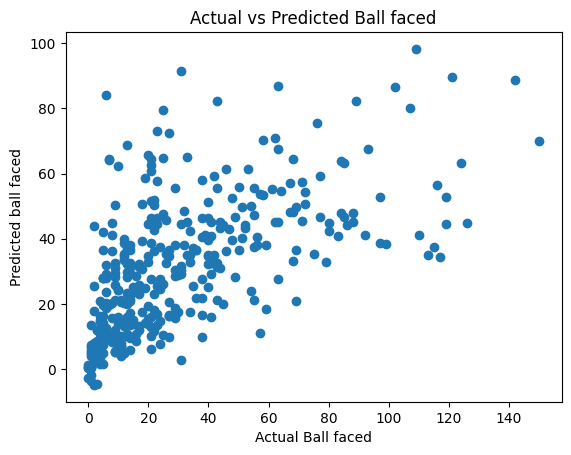

In [ ]:
# plot actual vs predicted balls faced
plt.scatter(y_test['Balls'], y_pred[:,1])
plt.xlabel('Actual Ball faced')
plt.ylabel('Predicted ball faced')
plt.title('Actual vs Predicted Ball faced')
plt.show()

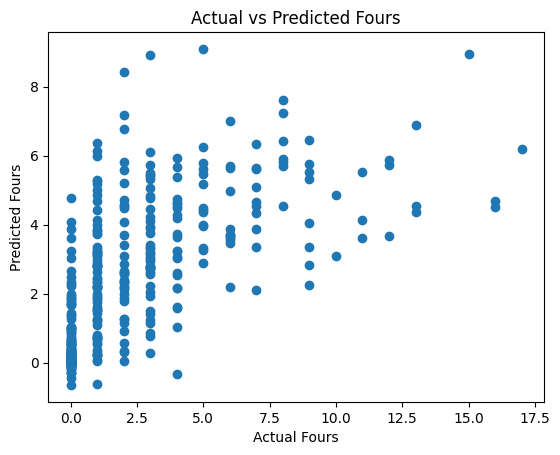

In [ ]:
# plot actual vs predicted Fours
plt.scatter(y_test['Fours'], y_pred[:,2])
plt.xlabel('Actual Fours')
plt.ylabel('Predicted Fours')
plt.title('Actual vs Predicted Fours')
plt.show()

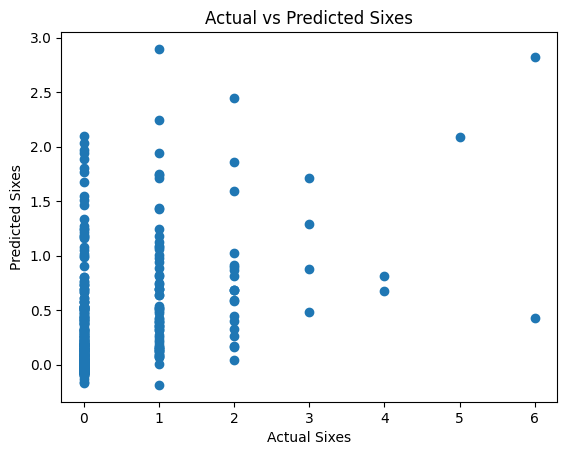

In [ ]:
# plot actual vs predicted Sixes
plt.scatter(y_test['Sixes'], y_pred[:,3])
plt.xlabel('Actual Sixes')
plt.ylabel('Predicted Sixes')
plt.title('Actual vs Predicted Sixes')
plt.show()

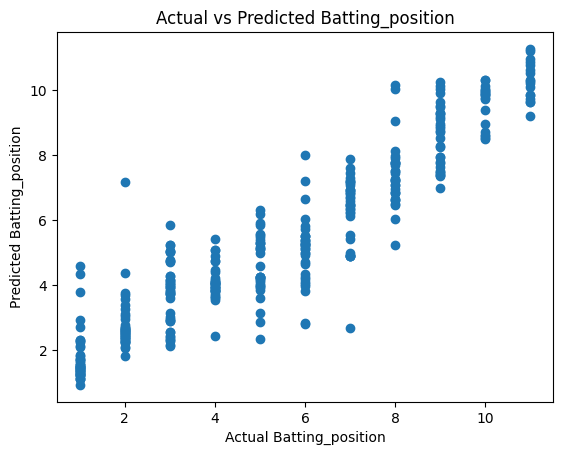

In [ ]:
# plot actual vs predicted battiNg Position
plt.scatter(y_test['Batting_position'], y_pred[:,4])
plt.xlabel('Actual Batting_position')
plt.ylabel('Predicted Batting_position')
plt.title('Actual vs Predicted Batting_position')
plt.show()

***BowliNg PerfromaNce PredictioN Module***

In [ ]:
bowling_df=bowling_dataset
bowling_df

,Name,Overs,Maidens,Runs,Bowler_Wickets,Econ,Dots,4s,6s,Wd,Nb,Match_id
0,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,1,656485
1,Taskin Ahmed,10.0,0,69,3,6.90,30,9,1,1,0,656485
2,Nasir Hossain,9.0,0,35,0,3.88,28,1,1,1,0,656485
3,Mahmudullah,1.0,0,4,0,4.00,3,0,0,0,0,656485
4,Rubel Hossain,10.0,0,56,1,5.60,25,4,1,1,1,656485
...,...,...,...,...,...,...,...,...,...,...,...,...
651,Hasan Mahmud,8.1,1,32,5,3.91,35,5,0,1,0,1355719
652,Taskin Ahmed,10.0,1,26,3,2.60,45,2,0,1,0,1355719
653,Ebadot Hossain,6.0,0,29,2,4.83,24,3,0,2,0,1355719
654,Nasum Ahmed,3.0,0,11,0,3.66,13,2,0,0,0,1355719


In [ ]:
bowling_weather_df=bowling_weather_dataset_updated
bowling_weather_df

,Date,Match_id,URL_Text,Bowling_Session,Venue,Temp,Wind,Rain,Cloud,Pressure
0,19-Mar-15,656485,ODI # 3641,14.30-18.00,Melbourne Cricket Ground,24,13,0.2,72,1017
1,17-Apr-15,858485,ODI # 3647,18.45-22.15,Shere Bangla National Stadium,31,13,0.0,46,1004
2,19-Apr-15,858487,ODI # 3648,14.30-18.00,Shere Bangla National Stadium,27,12,0.0,23,1007
3,22-Apr-15,858489,ODI # 3649,14.30-18.00,Shere Bangla National Stadium,25,13,2.4,65,1005
4,18-Jun-15,870731,ODI # 3658,19.15-22.45,Shere Bangla National Stadium,31,10,0.0,22,999
...,...,...,...,...,...,...,...,...,...,...
101,01-Mar-23,1351397,ODI # 4525,16.15-19.45,Shere Bangla National Stadium,31,14,0.0,0,1011
102,03-Mar-23,1351398,ODI # 4528,12.00-15.30,Shere Bangla National Stadium,30,11,0.0,0,1012
103,06-Mar-23,1351399,ODI # 4531,16.15-19.45,Zahur Ahmed Chowdhury Stadium,28,13,0.0,0,1010
104,18-Mar-23,1355717,ODI # 4539,15.00-18.30,Sylhet International Cricket Stadium,27,14,0.0,29,1012


Merged BowliNg dataset aNd BowliNg weather dataset

In [ ]:
bowling_merged_df = pd.merge(bowling_df, bowling_weather_df, on=['Match_id'])
bowling_merged_df.shape
bowling_merged_df


,Name,Overs,Maidens,Runs,Bowler_Wickets,Econ,Dots,4s,6s,Wd,...,Match_id,Date,URL_Text,Bowling_Session,Venue,Temp,Wind,Rain,Cloud,Pressure
0,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,...,656485,19-Mar-15,ODI # 3641,14.30-18.00,Melbourne Cricket Ground,24,13,0.2,72,1017
1,Taskin Ahmed,10.0,0,69,3,6.90,30,9,1,1,...,656485,19-Mar-15,ODI # 3641,14.30-18.00,Melbourne Cricket Ground,24,13,0.2,72,1017
2,Nasir Hossain,9.0,0,35,0,3.88,28,1,1,1,...,656485,19-Mar-15,ODI # 3641,14.30-18.00,Melbourne Cricket Ground,24,13,0.2,72,1017
3,Mahmudullah,1.0,0,4,0,4.00,3,0,0,0,...,656485,19-Mar-15,ODI # 3641,14.30-18.00,Melbourne Cricket Ground,24,13,0.2,72,1017
4,Rubel Hossain,10.0,0,56,1,5.60,25,4,1,1,...,656485,19-Mar-15,ODI # 3641,14.30-18.00,Melbourne Cricket Ground,24,13,0.2,72,1017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,Hasan Mahmud,8.1,1,32,5,3.91,35,5,0,1,...,1355719,23-Mar-23,ODI # 4547,10.45-14.15,Sylhet International Cricket Stadium,28,11,0.0,8,1006
652,Taskin Ahmed,10.0,1,26,3,2.60,45,2,0,1,...,1355719,23-Mar-23,ODI # 4547,10.45-14.15,Sylhet International Cricket Stadium,28,11,0.0,8,1006
653,Ebadot Hossain,6.0,0,29,2,4.83,24,3,0,2,...,1355719,23-Mar-23,ODI # 4547,10.45-14.15,Sylhet International Cricket Stadium,28,11,0.0,8,1006
654,Nasum Ahmed,3.0,0,11,0,3.66,13,2,0,0,...,1355719,23-Mar-23,ODI # 4547,10.45-14.15,Sylhet International Cricket Stadium,28,11,0.0,8,1006


Add bowling consistency, bowling form, bowling opposition, bowling venue into the dataset

In [ ]:
# Iterate over rows of bowling_merged_df
for index, row in bowling_merged_df.iterrows():
    # Get the player name from the row
    player_name = row['Name']
    
    # Calculate the batting consistency and form for the player
    bowling_consistency = get_bolwer_consistency(bowling_merged_df, player_name)
    bowling_form = get_bowler_form(bowling_merged_df, player_name)
    bowling_opposition=get_bowling_opposition(bowling_merged_df, player_name)
    bowling_venue= get_bowling_venue(bowling_merged_df, player_name)
    
    # Set the values for the new columns in the row
    bowling_merged_df.at[index, 'bowling_consistency'] = bowling_consistency
    bowling_merged_df.at[index, 'bowling_form'] = bowling_form
    bowling_merged_df.at[index, 'bowling_opposition']=bowling_opposition
    bowling_merged_df.at[index, 'bowling_venue']=bowling_venue



columns_1= bowling_merged_df.columns.tolist()
print(columns_1)
bowling_merged_df

<ipython-input-583-55b521349094>:29: RuntimeWarning: divide by zero encountered in double_scalars
  strike_rate=round((total_overs*6/total_wickets),2)
<ipython-input-583-55b521349094>:30: RuntimeWarning: divide by zero encountered in long_scalars
  average= round(total_runs/total_wickets,2)


['Name', 'Overs', 'Maidens', 'Runs', 'Bowler_Wickets', 'Econ', 'Dots', '4s', '6s', 'Wd', 'Nb', 'Match_id', 'Date', 'URL_Text', 'Bowling_Session', 'Venue', 'Temp', 'Wind', 'Rain', 'Cloud', 'Pressure', 'bowling_consistency', 'bowling_form', 'bowling_opposition', 'bowling_venue']


,Name,Overs,Maidens,Runs,Bowler_Wickets,Econ,Dots,4s,6s,Wd,...,Venue,Temp,Wind,Rain,Cloud,Pressure,bowling_consistency,bowling_form,bowling_opposition,bowling_venue
0,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,...,Melbourne Cricket Ground,24,13,0.2,72,1017,267.73,219.53,217.79,205.24
1,Taskin Ahmed,10.0,0,69,3,6.90,30,9,1,1,...,Melbourne Cricket Ground,24,13,0.2,72,1017,173.77,143.44,142.66,134.44
2,Nasir Hossain,9.0,0,35,0,3.88,28,1,1,1,...,Melbourne Cricket Ground,24,13,0.2,72,1017,74.84,64.94,65.57,61.79
3,Mahmudullah,1.0,0,4,0,4.00,3,0,0,0,...,Melbourne Cricket Ground,24,13,0.2,72,1017,81.24,73.08,75.05,70.23
4,Rubel Hossain,10.0,0,56,1,5.60,25,4,1,1,...,Melbourne Cricket Ground,24,13,0.2,72,1017,161.06,133.57,133.07,125.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,Hasan Mahmud,8.1,1,32,5,3.91,35,5,0,1,...,Sylhet International Cricket Stadium,28,11,0.0,8,1006,29.27,25.97,26.44,24.96
652,Taskin Ahmed,10.0,1,26,3,2.60,45,2,0,1,...,Sylhet International Cricket Stadium,28,11,0.0,8,1006,173.77,143.44,142.66,134.44
653,Ebadot Hossain,6.0,0,29,2,4.83,24,3,0,2,...,Sylhet International Cricket Stadium,28,11,0.0,8,1006,30.02,25.92,26.16,24.68
654,Nasum Ahmed,3.0,0,11,0,3.66,13,2,0,0,...,Sylhet International Cricket Stadium,28,11,0.0,8,1006,29.82,27.10,27.63,26.11


In [ ]:
match_list_df_1=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Match list data/match_lists_data - match_lists_data (3).csv')
match_list_df_1

In [ ]:
columns_1= bowling_merged_df.columns.tolist()
columns_2= match_list_df_1.columns.tolist()
# Print the column names
print(columns_1)
print(columns_2)

# Get the column names as sets
columns1 = set(bowling_merged_df.columns)
columns2 = set(match_list_df_1.columns)

# Find the common columns
common_cols = columns1.intersection(columns2)

# Print the number of common columns and their names
print("Number of common columns:", len(common_cols))
print("Common column names:", list(common_cols))

Drop duplicate columns without match id

In [ ]:
match_list_df_1= match_list_df_1.drop(columns=['Url text','Venue','Bowling_Session','Date'], axis=1)
match_list_df_1

In [ ]:
bowling_match_df=pd.merge(bowling_merged_df,match_list_df_1,on=['Match_id'])
bowling_match_df

In [ ]:
columns_1= bowling_match_df.columns.tolist()

print(columns_1)


**Features importance of bolwing performance prediction**

In [ ]:
# replace '-' with NaN
bowling_match_df = bowling_match_df.replace('-', np.nan)

# fill NaN values with a numeric value
bowling_match_df = bowling_match_df.fillna(0)

# separate the target variable
y = bowling_match_df['Result']
# print(X)
X = bowling_match_df.drop(columns=['Result','URL_Text','Date','Match_id'])
# print(X)


# encode categorical variables
cat_cols = ['Name', 'Batting_Session', 'Venue', 'Opposition', 'Ground', 'Bowling_Session', 'Toss_Win']
encoder = LabelEncoder()
X_encoded = X[cat_cols].apply(encoder.fit_transform)
X_encoded = X_encoded.join(X.drop(cat_cols, axis=1))

# print(X_encoded)
# print(X_encoded.max())
# print(X_encoded.min())

# replace infinity with NaN and drop rows containing NaN values
X_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
X_encoded.dropna(inplace=True)
y = y[X_encoded.index]



# scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# print(X_scaled)
# feature selection using Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


# fit the model on the selected features
rfc.fit(X_scaled, y)

# get the important feature names
feature_names = X_encoded.columns.tolist()


# plot feature importance
importance = rfc.feature_importances_
sorted_idx = np.argsort(importance)

plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_encoded.columns[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()



Run Random forest model to predict bowling performance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# print(X_scaled.columns)

bowling_match_df.replace([np.inf, -np.inf],np.nan,inplace=True)
bowling_match_df.dropna(inplace=True)

# separate the target variable
y = bowling_match_df[['Runs', 'Overs', 'Bowler_Wickets']]
X = bowling_match_df[['Opposition','Econ','Toss_Win','Score','Temp','Venue','Bowling_Session','Dots','Total_Overs','Wind','Pressure','Innings','bowling_consistency','bowling_form','bowling_opposition','bowling_venue']]

# encode categorical variables
cat_cols = ['Venue', 'Opposition', 'Bowling_Session']
encoder = LabelEncoder()
X_encoded = X[cat_cols].apply(encoder.fit_transform)
X_encoded = X_encoded.join(X.drop(cat_cols, axis=1))


# scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)


# train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lr.predict(X_test)

# calculate RMSE and R-squared values of lR model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)
print("*********************Overall Result of Linear Regression Model*********************************")
print('RMSE:', rmse)
print('R-squared:', r_squared)
print('\n\n')

# train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
multi_gbr = MultiOutputRegressor(gbr)
multi_gbr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = multi_gbr.predict(X_test)

# calculate RMSE and R-squared values of gradiant boostingg model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("*********************Overall Result of Gradiant boosting Model*********************************")
print('RMSE:', rmse)
print('R-squared:', r_squared)
print('\n\n')

# train the random forest model
rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rfc.predict(X_test)

# calculate RMSE and R-squared values of random forest model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("********************Overall result of random forest model*******************************8")
print('RMSE:', rmse)
print('R-squared:', r_squared)


print("********************** Individual result***************************")
for i, col in enumerate(y.columns):
    rmse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i], squared=False)
    r_squared = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(col)
    print('RMSE:', rmse)
    print('R-squared:', r_squared)

# Concatenate predicted output values with input features in test set
bowling_performance_data = pd.concat([pd.DataFrame(y_pred, columns=['Predicted_Runs', 'Predicted_Overs', 'Predicted_Wickets']), y_test.reset_index(drop=True)], axis=1)
bowling_performance_data

Visual impression of actual attributes and predicted attributes

In [ ]:
# plot actual vs predicted Runs conceded
plt.scatter(y_test['Runs'], y_pred[:,0])
plt.xlabel('Actual Runs conceded')
plt.ylabel('Predicted Runs conceded ')
plt.title('Actual vs Predicted Runs conceded')
plt.show()

In [ ]:
# plot actual vs predicted completed Overs
plt.scatter(y_test['Overs'], y_pred[:,1])
plt.xlabel('Actual completed overs')
plt.ylabel('Predicted completed overs')
plt.title('Actual vs Predicted completed overs')
plt.show()

In [ ]:
# plot actual vs predicted wickets taken
plt.scatter(y_test['Bowler_Wickets'], y_pred[:,2])
plt.xlabel('Actual Wickets taken')
plt.ylabel('Predicted Wickets taken')
plt.title('Actual vs Predicted Wickets taken')
plt.show()

Fielding Performance Prediction

In [ ]:
#import fielding dataset
fielding_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Fielding Dataset/Fielding Dataset - Sheet1.csv')
fielding_dataset

In [ ]:
fielding_dataset.corr()

Merge fileding dataset with weather dataset

In [ ]:
fielding_merged_df=pd.merge(fielding_dataset, fielding_weather_dataset_updated, on=['Match_id'])
fielding_merged_df

In [ ]:
columns=fielding_merged_df.columns.tolist()
print(columns)

Add fielding Success rate into the fielding dataset

In [ ]:
# Iterate over rows of batting_merged_df
for index, row in fielding_merged_df.iterrows():
    # Get the player name from the row
    player_name = row['Name']
    
    # Calculate the batting consistency and form for the player
    fielding_success_rate = get_fielding_success_rate(fielding_merged_df, player_name)
    
    # Set the values for the new columns in the row
    fielding_merged_df.at[index, 'fielding_success_rate'] = fielding_success_rate



columns_1= fielding_merged_df.columns.tolist()
print(columns_1)
fielding_merged_df

In [ ]:
columns_1= fielding_merged_df.columns.tolist()
columns_2= match_list_df_1.columns.tolist()
# Print the column names
print(columns_1)
print(columns_2)

# Get the column names as sets
columns1 = set(fielding_merged_df.columns)
columns2 = set(match_list_df_1.columns)

# Find the common columns
common_cols = columns1.intersection(columns2)

# Print the number of common columns and their names
print("Number of common columns:", len(common_cols))
print("Common column names:", list(common_cols))

merged fielding and weather dataset with match list dataset

In [ ]:

fielding_match_df=pd.merge(fielding_merged_df, match_list_df_1,on=['Match_id'])
fielding_match_df

Features Importance of fielding Performance prediction

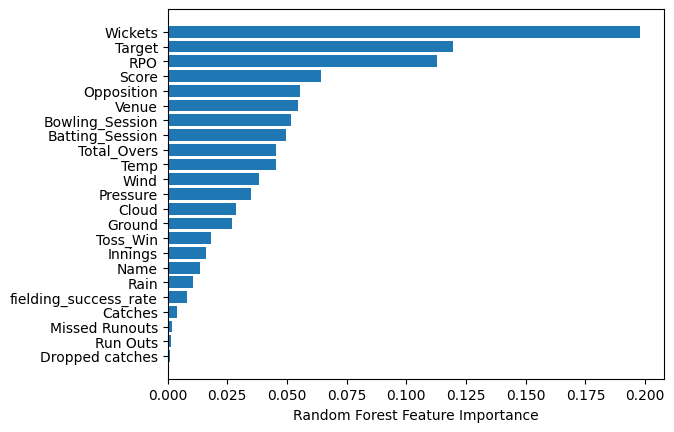

In [ ]:
# replace '-' with NaN
fielding_match_df = fielding_match_df.replace('-', np.nan)

# fill NaN values with a numeric value
fielding_match_df = fielding_match_df.fillna(0)

# separate the target variable
y = fielding_match_df['Result']
# print(X)
X = fielding_match_df.drop(columns=['Result','URL_Text','Date','Match_id'])
# print(X)


# encode categorical variables
cat_cols = ['Name', 'Batting_Session', 'Venue', 'Opposition', 'Ground', 'Bowling_Session', 'Toss_Win']
encoder = LabelEncoder()
X_encoded = X[cat_cols].apply(encoder.fit_transform)
X_encoded = X_encoded.join(X.drop(cat_cols, axis=1))

# print(X_encoded)
# print(X_encoded.max())
# print(X_encoded.min())

# replace infinity with NaN and drop rows containing NaN values
X_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
X_encoded.dropna(inplace=True)
y = y[X_encoded.index]



# scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# print(X_scaled)
# feature selection using Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


# fit the model on the selected features
rfc.fit(X_scaled, y)

# get the important feature names
feature_names = X_encoded.columns.tolist()


# plot feature importance
importance = rfc.feature_importances_
sorted_idx = np.argsort(importance)

plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_encoded.columns[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()



Run model to predict fielding performmance

In [ ]:


fielding_match_df.replace([np.inf, -np.inf],np.nan,inplace=True)
fielding_match_df.dropna(inplace=True)

# separate the target variable
y = fielding_match_df[['fielding_success_rate']]
X = fielding_match_df[['Opposition','Toss_Win','Score','Temp','Cloud','Venue','Bowling_Session','Total_Overs','Wind','Pressure','Innings']]

# encode categorical variables
cat_cols = ['Venue', 'Opposition', 'Bowling_Session']
encoder = LabelEncoder()
X_encoded = X[cat_cols].apply(encoder.fit_transform)
X_encoded = X_encoded.join(X.drop(cat_cols, axis=1))


# scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)


# train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lr.predict(X_test)

# calculate RMSE and R-squared values of lR model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)
print("*********************Overall Result of Linear Regression Model*********************************")
print('RMSE:', rmse)
print('R-squared:', r_squared)
print('\n\n')

# train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
multi_gbr = MultiOutputRegressor(gbr)
multi_gbr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = multi_gbr.predict(X_test)

# calculate RMSE and R-squared values of gradiant boostingg model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("*********************Overall Result of Gradiant boosting Model*********************************")
print('RMSE:', rmse)
print('R-squared:', r_squared)
print('\n\n')

# train the random forest model
rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rfc.predict(X_test)

# calculate RMSE and R-squared values of random forest model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("********************Overall result of random forest model*******************************8")
print('RMSE:', rmse)
print('R-squared:', r_squared)


*********************Overall Result of Linear Regression Model*********************************
RMSE: 0.21623025655491918
R-squared: -0.08248837550403887



*********************Overall Result of Gradiant boosting Model*********************************
RMSE: 0.2307722281143996
R-squared: -0.23298388521268154





<ipython-input-633-0b1249ab15be>:57: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


********************Overall result of random forest model*******************************8
RMSE: 0.2270713231152861
R-squared: -0.19375415218231473


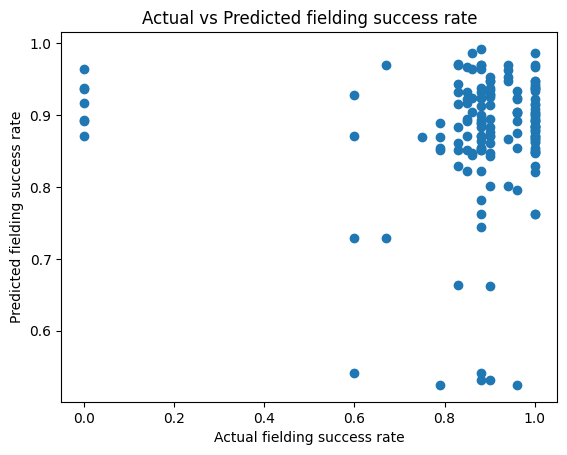

In [ ]:
# plot actual vs predicted wickets taken
plt.scatter(y_test, y_pred)
plt.xlabel('Actual fielding success rate')
plt.ylabel('Predicted fielding success rate')
plt.title('Actual vs Predicted fielding success rate')
plt.show()

**Players Rating Model based on predicted batting, bowling and fielding performance**

Import all necessary dataset

In [ ]:
dataset_batting=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Batting list/changed_Batting dataset.csv')
dataset_batting

,Name,Runs_Scored,Balls_Faced,Fours,Sixes,Strike_Rate,Batting_position,Match_id
0,Tamim Iqbal,25,25,4,0,100,1,656485
1,Imrul Kayes,5,14,0,0,35.71,2,656485
2,Soumya Sarkar,29,43,3,1,67.44,3,656485
3,Mahmudullah,21,31,2,0,67.74,4,656485
4,Shakib Al Hasan,10,34,0,0,29.41,5,656485
...,...,...,...,...,...,...,...,...
920,Taskin Ahmed,11,7,0,1,157.14,8,1355717
921,Nasum Ahmed,11,7,2,0,157.14,9,1355717
922,Mustafizur Rahman,1,2,0,0,50,10,1355717
923,Tamim Iqbal,41,41,5,2,100,1,1355719


In [ ]:
dataset_bowling=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Bowling List/changed_Bowling_data.csv')
dataset_bowling

,Name,Bowler_Overs,Maidens,Runs_Conceded,Bowler_Wickets,Econ,Dots,4s,6s,Wd,Nb,Match_id
0,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,1,656485
1,Taskin Ahmed,10.0,0,69,3,6.90,30,9,1,1,0,656485
2,Nasir Hossain,9.0,0,35,0,3.88,28,1,1,1,0,656485
3,Mahmudullah,1.0,0,4,0,4.00,3,0,0,0,0,656485
4,Rubel Hossain,10.0,0,56,1,5.60,25,4,1,1,1,656485
...,...,...,...,...,...,...,...,...,...,...,...,...
651,Hasan Mahmud,8.1,1,32,5,3.91,35,5,0,1,0,1355719
652,Taskin Ahmed,10.0,1,26,3,2.60,45,2,0,1,0,1355719
653,Ebadot Hossain,6.0,0,29,2,4.83,24,3,0,2,0,1355719
654,Nasum Ahmed,3.0,0,11,0,3.66,13,2,0,0,0,1355719


In [ ]:
dataset_batting_weather=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Weather Dataset/changed_batting_weather_data.csv')
dataset_batting_weather

,Match_id,Batting_Session,Venue,Batting_Temp,Batting_Wind,Batting_Rain,Batting_Cloud,Batting_Pressure
0,656485,18.45-22.15,Melbourne Cricket Ground,21,14,0.2,73,1017
1,858485,14.30-18.00,Shere Bangla National Stadium,34,13,0.0,46,1005
2,858487,18.45-22.15,Shere Bangla National Stadium,29,13,0.0,15,1008
3,858489,18.45-22.15,Shere Bangla National Stadium,27,13,2.6,62,1004
4,870731,15.00-18.30,Shere Bangla National Stadium,32,9,0.0,21,998
...,...,...,...,...,...,...,...,...
101,1351397,12.00-15.30,Shere Bangla National Stadium,36,15,0.0,0,1012
102,1351398,16.15-19.45,Shere Bangla National Stadium,32,10,0.0,0,1012
103,1351399,12.00-15.30,Zahur Ahmed Chowdhury Stadium,31,14,0.0,0,1011
104,1355717,10.45-14.15,Sylhet International Cricket Stadium,26,15,0.0,27,1013


In [ ]:
dataset_bowling_weather=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Bowling Weather Dataset/changed_bowling_weather_data.csv')
dataset_bowling_weather

,Match_id,Bowling_Session,Venue,Bowling_Temp,Bowling_Wind,Bowling_Rain,Bowling_Cloud,Bowling_Pressure
0,656485,14.30-18.00,Melbourne Cricket Ground,24,13,0.2,72,1017
1,858485,18.45-22.15,Shere Bangla National Stadium,31,13,0.0,46,1004
2,858487,14.30-18.00,Shere Bangla National Stadium,27,12,0.0,23,1007
3,858489,14.30-18.00,Shere Bangla National Stadium,25,13,2.4,65,1005
4,870731,19.15-22.45,Shere Bangla National Stadium,31,10,0.0,22,999
...,...,...,...,...,...,...,...,...
101,1351397,16.15-19.45,Shere Bangla National Stadium,31,14,0.0,0,1011
102,1351398,12.00-15.30,Shere Bangla National Stadium,30,11,0.0,0,1012
103,1351399,16.15-19.45,Zahur Ahmed Chowdhury Stadium,28,13,0.0,0,1010
104,1355717,15.00-18.30,Sylhet International Cricket Stadium,27,14,0.0,29,1012


In [ ]:
#Merge bating_match_df, Bowling_match_df and fielding_match_df together

# merged_all_dataset=pd.merge(batting_match_df,bowling_match_df,on=['Match_id'])
# merged_all_dataset

columns_1= batting_match_df.columns.tolist()
columns_2= bowling_match_df.columns.tolist()
# Print the column names
print(columns_1)
print(columns_2)

# Get the column names as sets
columns1 = set(batting_match_df.columns)
columns2 = set(bowling_match_df.columns)

# Find the common columns
common_cols = columns1.intersection(columns2)

# Print the number of common columns and their names
print("Number of common columns:", len(common_cols))
print("Common column names:", list(common_cols))


['Name', 'Description', 'Runs', 'Balls', 'Fours', 'Sixes', 'Strike_Rate', 'Batting_position', 'Match_id', 'Date', 'URL_Text', 'Batting_Session', 'Venue', 'Temp', 'Wind', 'Rain', 'Cloud', 'Pressure', 'batting_consistency', 'batting_form', 'Score', 'Wickets', 'Overs', 'RPO', 'Target', 'Innings', 'Result', 'Opposition', 'Ground', 'Url text', 'Bowling_Session', 'Toss_Win']
['Name', 'Overs', 'Maidens', 'Runs', 'Bowler_Wickets', 'Econ', 'Dots', '4s', '6s', 'Wd', 'Nb', 'Match_id', 'Date', 'URL_Text', 'Bowling_Session', 'Venue', 'Temp', 'Wind', 'Rain', 'Cloud', 'Pressure', 'bowling_consistency', 'bowling_form', 'bowling_opposition', 'bowling_venue', 'Score', 'Wickets', 'Total_Overs', 'RPO', 'Target', 'Innings', 'Result', 'Opposition', 'Ground', 'Batting_Session', 'Toss_Win']
Number of common columns: 23
Common column names: ['Wind', 'Name', 'Ground', 'Date', 'Runs', 'Score', 'Result', 'Wickets', 'Toss_Win', 'Rain', 'Batting_Session', 'Opposition', 'RPO', 'Pressure', 'Overs', 'URL_Text', 'Innin

In [ ]:
batting_match_df=batting_match_df.rename(columns={'Runs':'Runs_Scored','Balls':'Balls_Faced','Venue':'Batting_Venue','Temp':'Batting_Temp','Wind':'Batting_Wind','Rain':'Batting_Wind','Cloud':'Batting_Cloud','Pressure':'Batting_Pressure','Overs':'Total_Overs','Url text':'URL_Text'})
bowling_match_df=bowling_match_df.rename(columns={'Overs':'Bowler_Over','Runs':'Runs_Conceded','Venue':'Bowling_Venue','Temp':'Bowling_Temp','Wind':'Bowling_Wind','Rain':'Bowling_Wind','Cloud':'Bowling_Cloud','Pressure':'Bowling_Pressure','Url text':'URL_Text'})
batting_match_df
# bowling_match_df

batting_match_df_copy=batting_match_df.copy()
batting_match_df=batting_match_df_copy.drop(columns=['Score', 'Result', 'Batting_Session', 'Wickets', 'Name', 'Opposition', 'Total_Overs', 'RPO', 'Bowling_Session', 'URL_Text', 'Innings', 'Toss_Win', 'Ground', 'Date', 'Target'])

# Get the column names as sets
columns1 = set(batting_match_df.columns)
columns2 = set(bowling_match_df.columns)

# Find the common columns
common_cols = columns1.intersection(columns2)

# Print the number of common columns and their names
print("Number of common columns:", len(common_cols))
print("Common column names:", list(common_cols))





Number of common columns: 1
Common column names: ['Match_id']


In [ ]:
#merged batting and bowling match df together
batting_bowling_df=pd.merge(bowling_match_df,batting_match_df)
batting_bowling_df

,Name,Bowler_Over,Maidens,Runs_Conceded,Bowler_Wickets,Econ,Dots,4s,6s,Wd,...,Strike_Rate,Batting_position,Batting_Venue,Batting_Temp,Batting_Wind,Batting_Wind,Batting_Cloud,Batting_Pressure,batting_consistency,batting_form
0,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,...,100,1,Melbourne Cricket Ground,21,14,0.2,73,1017,52.49,52.49
1,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,...,35.71,2,Melbourne Cricket Ground,21,14,0.2,73,1017,39.70,39.70
2,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,...,67.44,3,Melbourne Cricket Ground,21,14,0.2,73,1017,42.61,42.61
3,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,...,67.74,4,Melbourne Cricket Ground,21,14,0.2,73,1017,50.47,50.47
4,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,...,29.41,5,Melbourne Cricket Ground,21,14,0.2,73,1017,51.72,51.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5608,Ebadot Hossain,6.0,0,29,2,4.83,24,3,0,2,...,131.57,2,Sylhet International Cricket Stadium,26,10,0.0,8,1006,39.00,39.00
5609,Nasum Ahmed,3.0,0,11,0,3.66,13,2,0,0,...,100,1,Sylhet International Cricket Stadium,26,10,0.0,8,1006,35.08,35.08
5610,Nasum Ahmed,3.0,0,11,0,3.66,13,2,0,0,...,131.57,2,Sylhet International Cricket Stadium,26,10,0.0,8,1006,39.00,39.00
5611,Mehidy Hasan Miraz,1.0,0,3,0,3.00,3,0,0,0,...,100,1,Sylhet International Cricket Stadium,26,10,0.0,8,1006,35.08,35.08


In [ ]:
columns=batting_bowling_df.columns.tolist()
print(columns)

['Name', 'Bowler_Over', 'Maidens', 'Runs_Conceded', 'Bowler_Wickets', 'Econ', 'Dots', '4s', '6s', 'Wd', 'Nb', 'Match_id', 'Date', 'URL_Text', 'Bowling_Session', 'Bowling_Venue', 'Bowling_Temp', 'Bowling_Wind', 'Bowling_Wind', 'Bowling_Cloud', 'Bowling_Pressure', 'bowling_consistency', 'bowling_form', 'bowling_opposition', 'bowling_venue', 'Score', 'Wickets', 'Total_Overs', 'RPO', 'Target', 'Innings', 'Result', 'Opposition', 'Ground', 'Batting_Session', 'Toss_Win', 'Description', 'Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Batting_position', 'Batting_Venue', 'Batting_Temp', 'Batting_Wind', 'Batting_Wind', 'Batting_Cloud', 'Batting_Pressure', 'batting_consistency', 'batting_form']


Features Importance for Ann Rating model

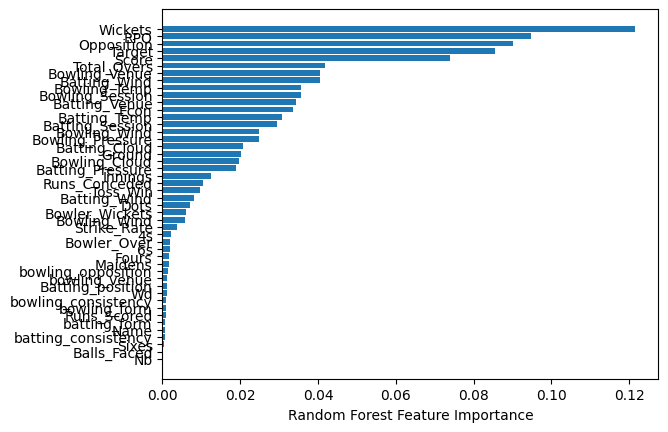

In [ ]:
# replace '-' with NaN
batting_bowling_df = batting_bowling_df.replace('-', np.nan)

# fill NaN values with a numeric value
batting_bowling_df = batting_bowling_df.fillna(0)

# separate the target variable
y = batting_bowling_df['Result']
# print(X)
X = batting_bowling_df.drop(columns=['Result','Description','URL_Text','Date','Match_id'])
# print(X)


# encode categorical variables
cat_cols = ['Name', 'Batting_Session', 'Batting_Venue','Bowling_Venue', 'Opposition', 'Ground', 'Bowling_Session', 'Toss_Win']
encoder = LabelEncoder()
X_encoded = X[cat_cols].apply(encoder.fit_transform)
X_encoded = X_encoded.join(X.drop(cat_cols, axis=1))

# print(X_encoded)
# print(X_encoded.max())
# print(X_encoded.min())

# replace infinity with NaN and drop rows containing NaN values
X_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
X_encoded.dropna(inplace=True)
y = y[X_encoded.index]



# scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# print(X_scaled)
# feature selection using Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


# fit the model on the selected features
rfc.fit(X_scaled, y)

# get the important feature names
feature_names = X_encoded.columns.tolist()


# plot feature importance
importance = rfc.feature_importances_
sorted_idx = np.argsort(importance)

plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_encoded.columns[sorted_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()



In [ ]:
print(batting_bowling_df.columns.tolist())

Run ANN Model for Rating players

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix

# print(batting_bowling_df.columns.tolist())
# # # One-hot encode the categorical variables
# # batting_bowling_df = pd.get_dummies(batting_bowling_df)


# print(batting_bowling_df.columns.tolist())
# # batting_bowling_df=batting_bowling_df.drop(columns=['Date','Opposition','URL_Text'])

# X = batting_bowling_df[['Bowler_Over','Opposition','Target','Batting_Temp','Batting_Wind','Batting_Pressure','Batting_Cloud','batting_consistency','bowling_consistency','bowling_form','bowling_opposition', 'Maidens','Bowling_Temp','Bowling_Wind','Bowling_Cloud','Bowling_Pressure','Bowling_Venue','Batting_Venue', 'Runs_Conceded', 'Bowler_Wickets', 'Econ', 'Dots', '4s', '6s', 'Wd', 'Nb', 'Score', 'Wickets', 'Total_Overs', 'RPO', 'Batting_position','Batting_Session','Bowling_Session', 'Fours', 'Sixes']]
# y = batting_bowling_df['Result']




# # # encode categorical variables
# # cat_cols = ['Bowling_Venue','Batting_Venue', 'Opposition','Batting_Session', 'Bowling_Session']
# # encoder = LabelEncoder()
# # X_encoded = X[cat_cols].apply(encoder.fit_transform)
# # X_encoded = X_encoded.join(X.drop(cat_cols, axis=1))


# # # scale the data
# # scaler = MinMaxScaler()
# # X_scaled = scaler.fit_transform(X_encoded)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train an MLP classifier
# mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
# mlp.fit(X_train, y_train)

# # Predict the probability of winning for each player
# y_pred_proba = mlp.predict_proba(X_test)[:, 1]

# # Rate the players based on the predicted probability
# player_ratings = pd.DataFrame({'Name': batting_bowling_df['Name'], 'Rating': y_pred_proba})
# player_ratings = player_ratings.groupby('Name')['Rating'].mean().reset_index()

# # Evaluate the model performance
# y_pred = mlp.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_error = (conf_matrix[0, 1] + conf_matrix[1, 0]) / np.sum(conf_matrix)
# sensitivity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0])
# specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
# false_positive_rate = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[0, 0])
# precision = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# # Print the evaluation metrics
# print('Accuracy:', accuracy)
# print('Confusion matrix:', conf_matrix)
# print('Classification error:', classification_error)
# print('Sensitivity:', sensitivity)
# print('Specificity:', specificity)
# print('False positive rate:', false_positive_rate)
# print('Precision:', precision)